## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 8
## PCA

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Breast Cancer Dataset

In [282]:
from sklearn.datasets import load_breast_cancer
breastCancer = load_breast_cancer()

In [283]:
breastCancer_data = breastCancer.data
print(breastCancer_data.shape)

breastCancer_labels = breastCancer.target
print(breastCancer_labels.shape)

(569, 30)
(569,)


In [284]:
labels_bc = np.reshape(breastCancer_labels,(569,1))
breastCancer_data = np.concatenate([breastCancer_data,labels_bc],axis=1)
print(breastCancer_data.shape)

(569, 31)


In [285]:
df_bc = pd.DataFrame(breastCancer_data)

In [286]:
features_bc = breastCancer.feature_names
print(features_bc)

feat_labels_bc = np.append(features_bc,'label')
df_bc.columns = feat_labels_bc

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [287]:
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [288]:
df_bc['label'] = df_bc['label'].map({0.0: 'Benign', 1.0: 'Malignant'})
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [289]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [290]:
x_bc = df_bc.loc[:, features_bc].values
x_bc = StandardScaler().fit_transform(x_bc)
x_bc.shape

(569, 30)

In [291]:
feat_cols_bc = ['feature'+str(i) for i in range(x_bc.shape[1])]
normalised_bc = pd.DataFrame(x_bc,columns=feat_cols_bc)
normalised_bc.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [292]:
pca_bc = PCA(n_components=2)
pca_bc_data = pca_bc.fit_transform(x_bc)

principal_bc_df = pd.DataFrame(data = pca_bc_data, columns = ['principal component 1', 'principal component 2'])
principal_bc_df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [293]:
print('Variation per principal component: {}'.format(pca_bc.explained_variance_ratio_))

Variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

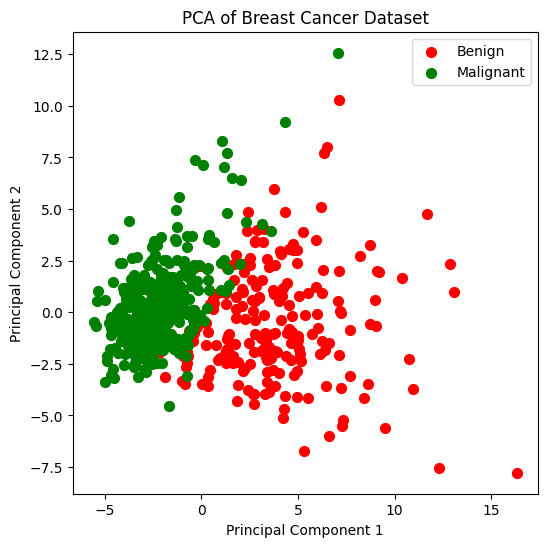

In [294]:
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA of Breast Cancer Dataset")

targets_bc = ['Benign', 'Malignant']
colors_bc = ['r', 'g']

for target, color in zip(targets_bc,colors_bc):
    idx = df_bc['label'] == target
    plt.scatter(principal_bc_df.loc[idx, 'principal component 1'], 
                principal_bc_df.loc[idx, 'principal component 2'], c = color, s = 50)
    
plt.legend(targets_bc)

# IRIS Dataset

In [295]:
from sklearn.datasets import load_iris
iris = load_iris()

In [296]:
iris_data = iris.data
print(iris_data.shape)

iris_labels = iris.target
print(iris_labels.shape)

(150, 4)
(150,)


In [297]:
labels_i = np.reshape(iris_labels,(150,1))
iris_data = np.concatenate([iris_data,labels_i],axis=1)
print(iris_data.shape)

(150, 5)


In [298]:
df_i = pd.DataFrame(iris_data)

In [299]:
features_i = iris.feature_names
print(features_i)

feat_labels_i = np.append(features_i,'label')
df_i.columns = feat_labels_i

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [300]:
df_i.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [301]:
df_i['label'] = df_i['label'].map({0.0: 'Setosa', 1.0: 'Versicolour', 2.0: 'Virginica'})
df_i.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [302]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [303]:
x_i = df_i.loc[:, features_i].values
x_i = StandardScaler().fit_transform(x_i)
x_i.shape

(150, 4)

In [304]:
feat_cols1 = ['feature'+str(i) for i in range(x_i.shape[1])]
normalised_iris = pd.DataFrame(x_i,columns=feat_cols1)
normalised_iris.head()

,feature0,feature1,feature2,feature3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [305]:
pca_i = PCA(n_components=3)
pca_i_data = pca_i.fit_transform(x_i)

principal_i_df = pd.DataFrame(data = pca_i_data, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_i_df.head()

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [306]:
print('Variation per principal component: {}'.format(pca_i.explained_variance_ratio_))

Variation per principal component: [0.72962445 0.22850762 0.03668922]


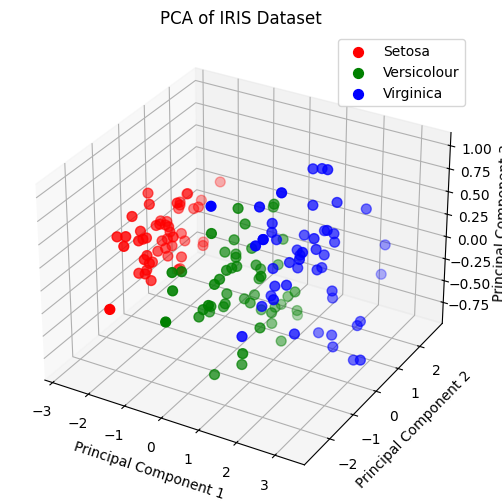

In [307]:
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title("PCA of IRIS Dataset")

targets_i = ['Setosa', 'Versicolour', 'Virginica']
colors_i = ['r', 'g', 'b']

for target, color in zip(targets_i, colors_i):
    idx = df_i['label'] == target
    ax.scatter3D(principal_i_df.loc[idx, 'principal component 1'], 
                 principal_i_df.loc[idx, 'principal component 2'], 
                 principal_i_df.loc[idx, 'principal component 3'], 
                 c=color, s=50)
    
ax.legend(targets_i)
plt.show()